In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

# Importing Data set from local machine.

In [3]:
df = pd.read_csv("C:/Users/Arjun/Documents/DataSets/Crop yield data Seggregated.csv",encoding='latin-1')
print(df.head())

   Rain Fall (mm)  Fertilizer(urea) (kg/acre)  Temperature (°C)  Nitrogen (N)  \
0            1230                          80                28            80   
1             480                          60                36            70   
2            1250                          75                29            78   
3             450                          65                35            70   
4            1200                          80                27            79   

   Phosphorus (P)  Potassium (K)  Yeild (Q/acre)  
0              24             20            12.0  
1              20             18             8.0  
2              22             19            11.0  
3              19             18             9.0  
4              22             19            11.0  


# Searching for Outliers and Missing values.

In [4]:
print(df.isna().sum())

Rain Fall (mm)                0
Fertilizer(urea) (kg/acre)    0
Temperature (°C)              0
Nitrogen (N)                  0
Phosphorus (P)                0
Potassium (K)                 0
Yeild (Q/acre)                0
dtype: int64


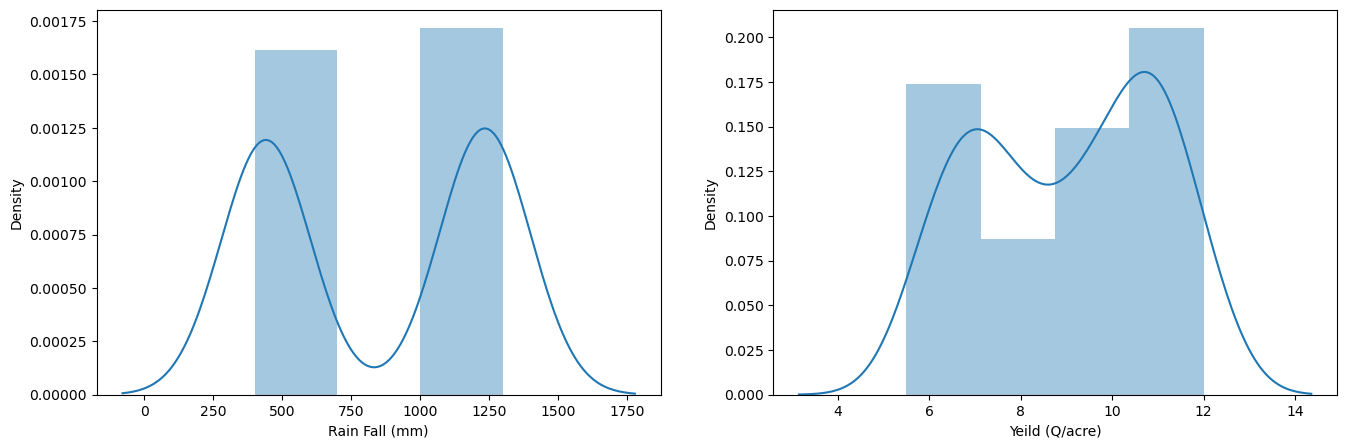

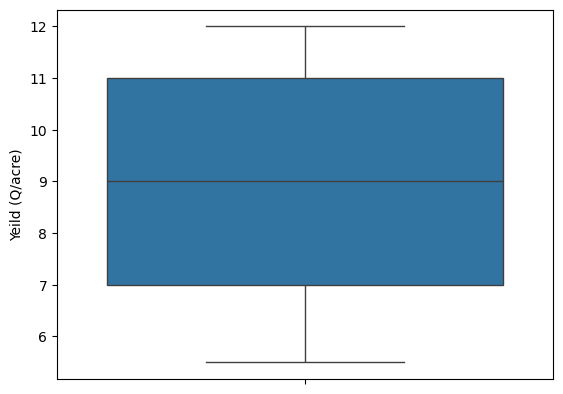

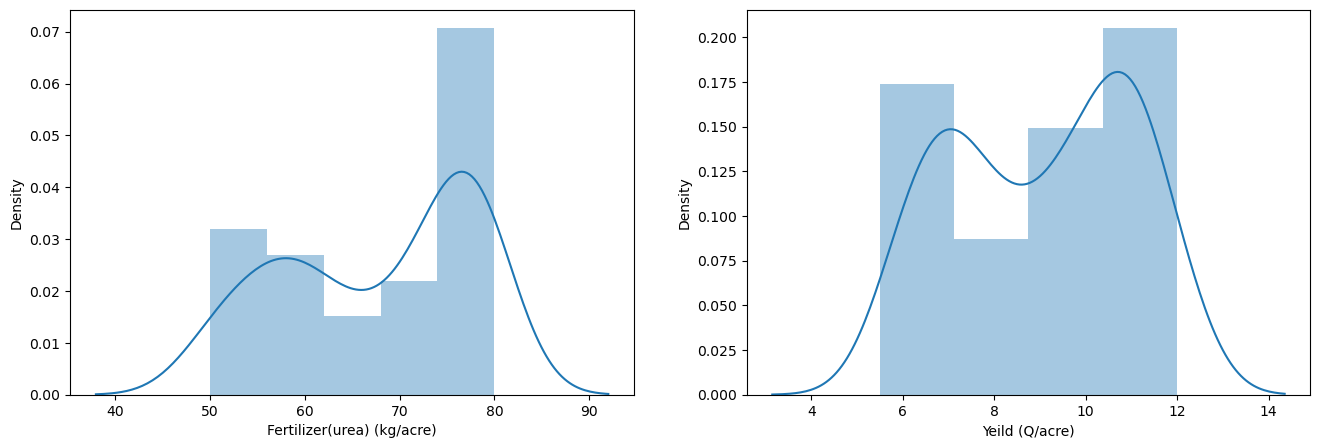

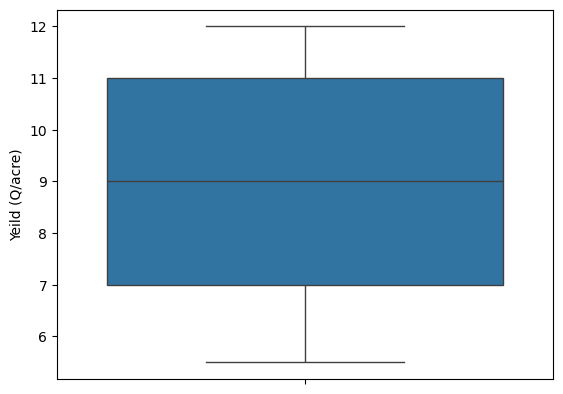

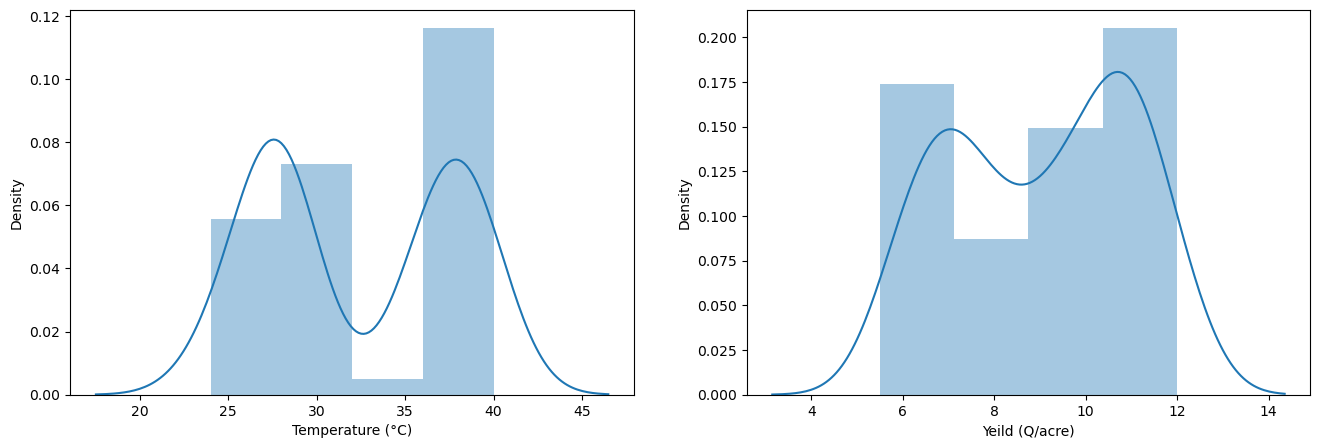

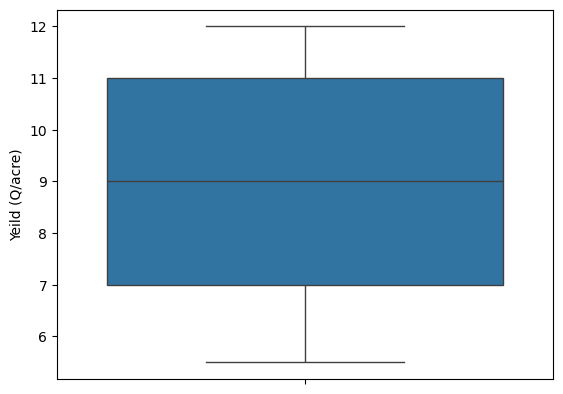

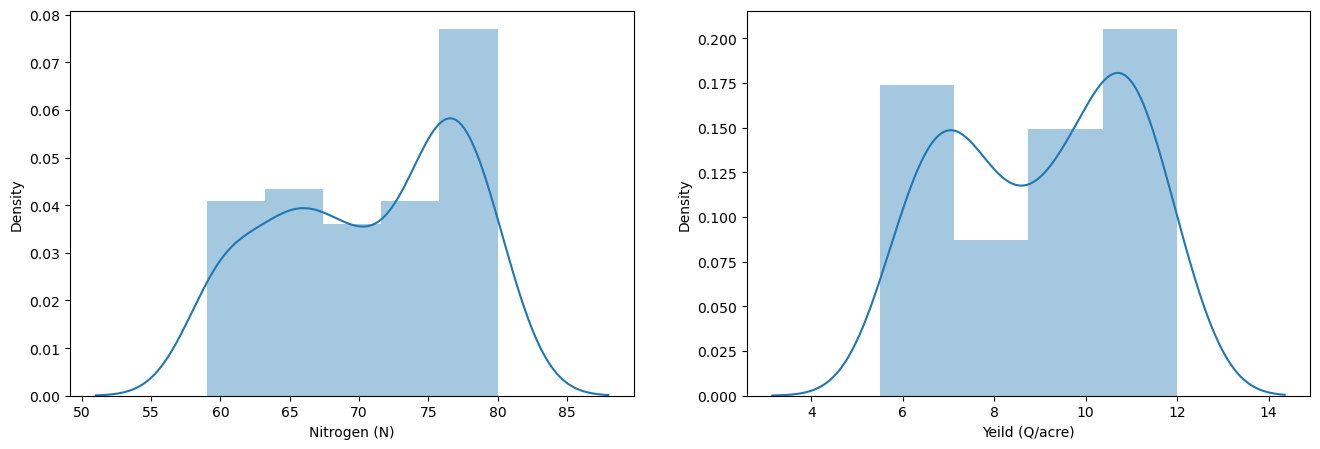

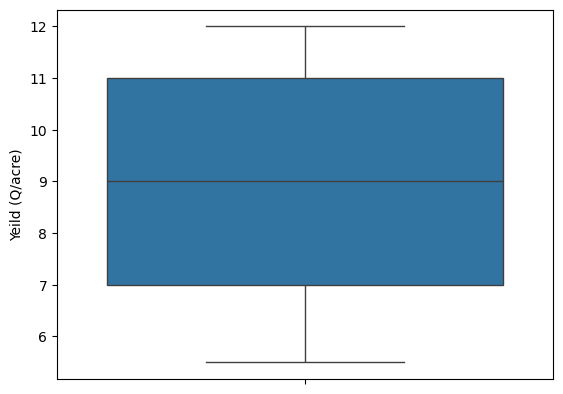

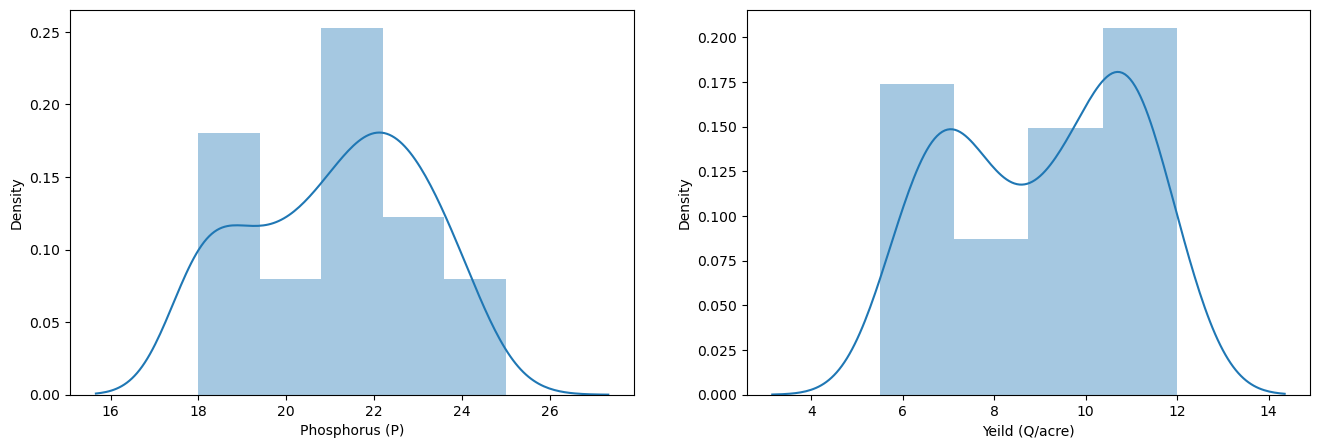

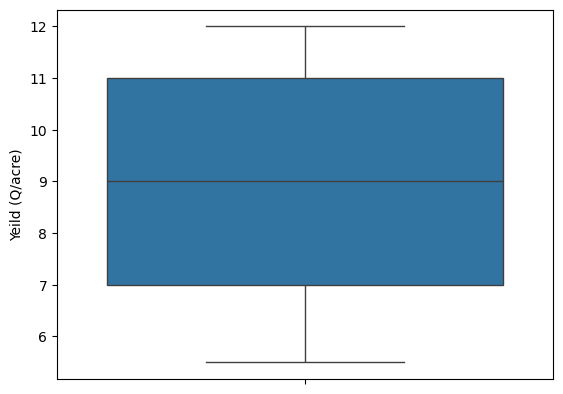

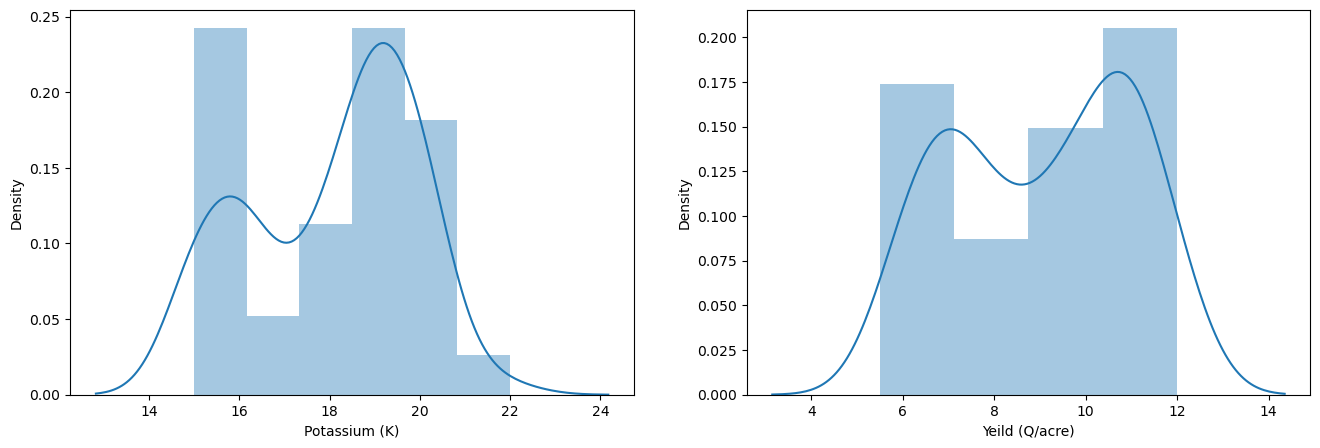

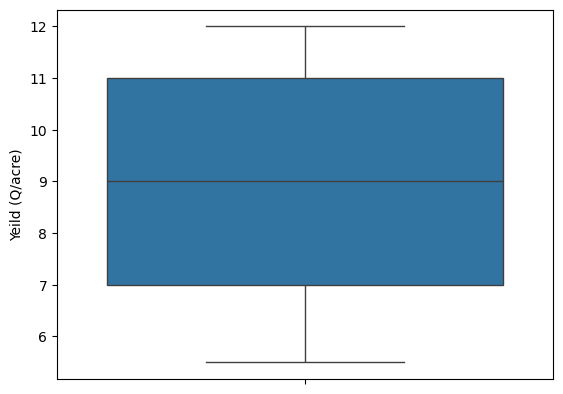

In [5]:
x = df.loc[:, df.columns != 'Yeild (Q/acre)']
y = df['Yeild (Q/acre)']

import warnings
warnings.filterwarnings("ignore")

for col in x.columns: 
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.distplot(x[col])
    plt.subplot(1,2,2)
    sns.distplot(df['Yeild (Q/acre)'])
    plt.show()
    sns.boxplot(df['Yeild (Q/acre)'])

Finding IQRs at 1st and 3rd quartile.

In [6]:
percentile25 = df['Yeild (Q/acre)'].quantile(0.25)
percentile75 = df['Yeild (Q/acre)'].quantile(0.75)
iqr = percentile75 - percentile25

finding upper limit and lower limits.

In [7]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

finding outliers. (note: no output represents, no outliers)

In [8]:
df[df['Yeild (Q/acre)'] > upper_limit]
df[df['Yeild (Q/acre)'] < lower_limit]

,Rain Fall (mm),Fertilizer(urea) (kg/acre),Temperature (°C),Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)


In [9]:
new_df_cap = df.copy()
new_df_cap['Yeild (Q/acre)'] = np.where(
    new_df_cap['Yeild (Q/acre)'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Yeild (Q/acre)'] < lower_limit,
        lower_limit,
        new_df_cap['Yeild (Q/acre)']))
print(new_df_cap)

    Rain Fall (mm)  Fertilizer(urea) (kg/acre)  Temperature (°C)  \
0             1230                          80                28   
1              480                          60                36   
2             1250                          75                29   
3              450                          65                35   
4             1200                          80                27   
..             ...                         ...               ...   
94            1250                          77                28   
95             425                          60                39   
96            1220                          79                28   
97             480                          65                36   
98            1230                          80                28   

    Nitrogen (N)  Phosphorus (P)  Potassium (K)  Yeild (Q/acre)  
0             80              24             20            12.0  
1             70              20             18    

# Model Selection and prediction

In [10]:
x = new_df_cap.loc[:, new_df_cap.columns != 'Yeild (Q/acre)']
y = new_df_cap['Yeild (Q/acre)']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.80, random_state= 1)

mse_list , degree_list = [] , []

for degree in range(10):
    x_poly_train = PolynomialFeatures(degree).fit_transform(x_train)
    x_poly_test = PolynomialFeatures(degree).fit_transform(x_test)

    polyreg = LinearRegression()
    polyreg.fit(x_poly_train, y_train)
    y_poly_pred = polyreg.predict(x_poly_test)
    mse = mean_squared_error(y_test, y_poly_pred)
    degree_list.append(degree)
    mse_list.append(float(mse))

degree_mse_dict = dict(zip(degree_list, mse_list))
print(degree_mse_dict)
best_degree = degree_list[mse_list.index(min(mse_list))]
print(best_degree)

{0: 3.7156855955678667, 1: 0.7777944018579879, 2: 5.873952524472834, 3: 4.843862644446594, 4: 4.825981689457583, 5: 12.990515791778813, 6: 103.80112429197285, 7: 1182.8061357982974, 8: 14226.885607326569, 9: 166222.63135088352}
1


In [16]:
#Since we have out best MSE as 1, we can use a multi-linear regression model. 

lreg = LinearRegression()
lreg.fit(x_train,y_train)
y_pred = lreg.predict(x_test)
results = x_test.copy()
results['Actual'] = y_test.values
results['Predicted'] = y_pred
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred, squared = False)
print(results)
datatoexcel = pd.ExcelWriter('Crop Yield Results.xlsx')
 
# write DataFrame to excel
results.to_excel(datatoexcel)
 
# save the excel
datatoexcel.close()


    Rain Fall (mm)  Fertilizer(urea) (kg/acre)  Temperature (°C)  \
92            1150                          78                29   
83             450                          65                39   
32            1275                          76                26   
80            1200                          77                29   
78            1175                          70                28   
..             ...                         ...               ...   
13             425                          50                37   
68            1225                          75                29   
84            1300                          76                28   
14            1250                          70                24   
29            1200                          72                29   

    Nitrogen (N)  Phosphorus (P)  Potassium (K)  Actual  Predicted  
92            77              21             18     9.0  10.552666  
83            70              20             

Mean Squared Error: 0.7777944018579868
Root Mean Squared Error: 0.8819265286054087
Feature Importance:
                      Feature  Coefficient
4              Phosphorus (P)     0.227425
3                Nitrogen (N)     0.192273
2            Temperature (°C)    -0.035888
5               Potassium (K)    -0.031370
1  Fertilizer(urea) (kg/acre)    -0.019907
0              Rain Fall (mm)     0.000919


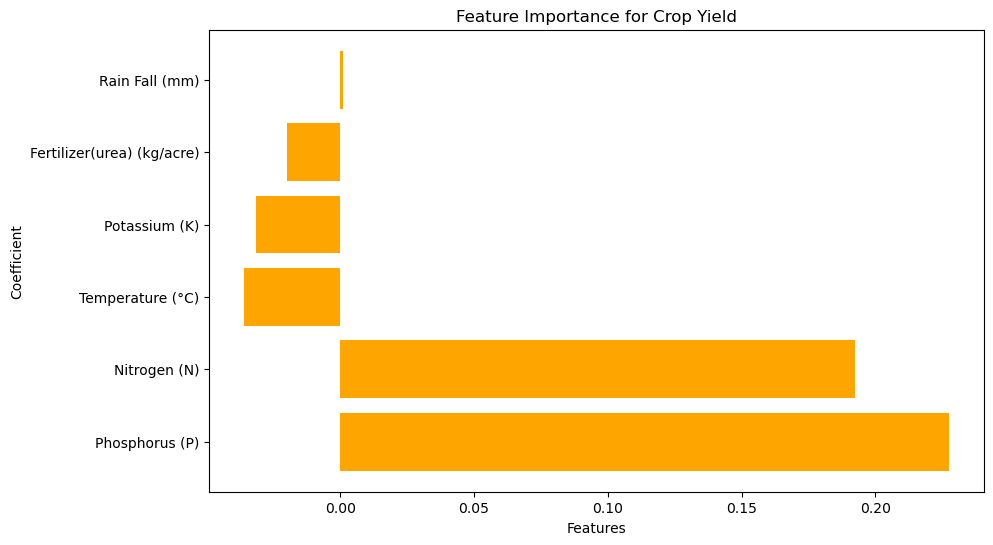

In [18]:
# Get the coefficients
coefficients = lreg.coef_
feature_importance = pd.DataFrame({'Feature': x.columns, 'Coefficient': coefficients})

# Sort by absolute value of the coefficient
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Print results
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print("Feature Importance:")
print(feature_importance[['Feature', 'Coefficient']])

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'],color="orange")
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Importance for Crop Yield')
plt.show()

# Plot predictions vs actual values
#plt.figure(figsize=(10, 6))
#plt.scatter(y_test, y_pred,color="red")
#plt.xlabel('Actual Yield (Q/acre)')
#plt.ylabel('Predicted Yield (Q/acre)')
#plt.title('Actual vs Predicted Yield')

#min_val = min(y_test.min(), y_pred.min())
#max_val = max(y_test.max(), y_pred.max())
#plt.plot([min_val, max_val], [min_val, max_val], color='green', linestyle='--', label='Ideal Fit')

#plt.legend()
#plt.show()

#### By the graph above, we can see that the most important factors are Phosphorous, Nitrogen and rain fall. Whereas, on the other hand we can see that fertilizers, pottasium and temperature have a negative effect on yeild